# **Homework 4 : Decision Tree**

## **Problem** - Design and develop a Machine learning model that can help in Loan repayment Prediction using Decision Tree algorithm

## **Dataset** - The Loan Repayment dataset is made up of 1000 rows and six columns. Each row represents information about a particular person that relates to loan repayment. This dataset is perfect for classification algorithms such as the decision tree. 

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Import Code

In [2]:
# Read dataset
df_loans = pd.read_csv('Loans_Dataset.csv')

# Print first 10 rows of dataset
df_loans.head(10)

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
5,406,10187,166,3068,13827,yes
6,461,10252,172,3062,13947,yes
7,158,10192,144,3469,13963,yes
8,136,10376,230,3223,13965,yes
9,194,10092,626,3083,13995,yes


In [3]:
# Print last 10 rows of dataset
df_loans.tail(10)

,initial_payment,last_payment,credit_score,house_number,sum,result
994,301,14852,812,4564,20529,No
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No
999,168,14798,834,4937,20737,No
1000,234,14567,756,4766,20678,yes
1001,450,13897,867,7896,210456,yes
1002,347,14999,687,9876,246789,yes
1003,467,13555,666,7899,21786,yes


In [4]:
# Examine values in dataset
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


## Preprocessing

### Get required data

In [5]:
# Get required data
df_loans.drop(columns = ['house_number'], inplace=True)
df_loans.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes


## Describe

In [6]:
# Describe data
df_loans.describe()

,initial_payment,last_payment,credit_score,sum
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,17744.012948
std,115.844218,1442.134231,259.681745,9594.659715
min,100.000000,10005.000000,100.000000,13515.000000
25%,195.750000,11213.500000,302.750000,16081.250000
50%,290.000000,12467.000000,518.000000,17383.000000
75%,398.000000,13690.000000,755.000000,18608.250000
max,500.000000,14999.000000,997.000000,246789.000000


## Distribution

C:\Users\derrick.harden\AppData\Local\Temp\ipykernel_19536\348000199.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loans['credit_score'])


<Axes: xlabel='credit_score', ylabel='Density'>

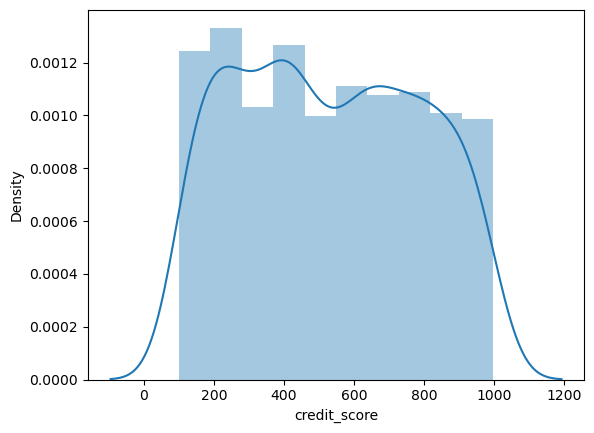

In [7]:
# Salary distribution
sns.distplot(df_loans['credit_score'])

## Label encoding 

In [8]:
# Label encoding
le = LabelEncoder()
df_loans['result'] = le.fit_transform(df_loans['result'])

## Correlation Matrix

In [9]:
# Correlation matrix
df_loans.corr()

,initial_payment,last_payment,credit_score,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.068387,-0.076326
sum,0.050698,0.213237,0.068387,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.092830,1.000000


<Axes: >

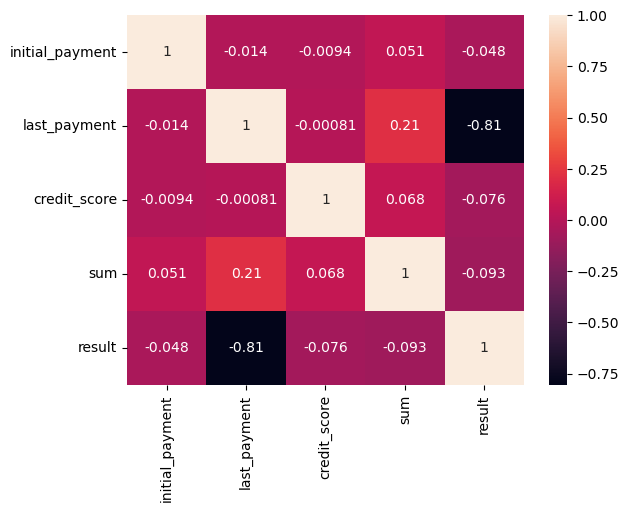

In [10]:
# Create a heatmap to determine unneccessary data
sns.heatmap(df_loans.corr(), annot=True)

## Drop insignificant data

In [11]:
# drop last_repayment column
df_loans.drop(columns=['last_payment'], inplace=True)

## Relationship 

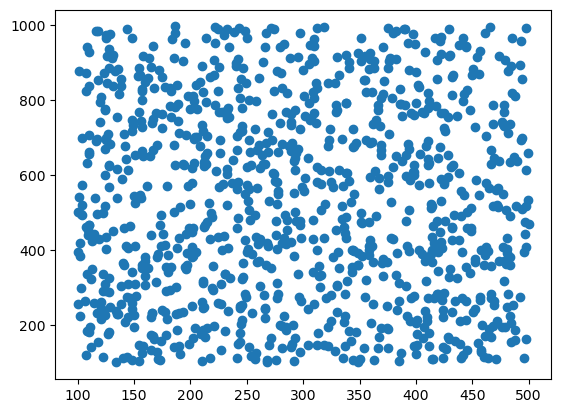

In [12]:
# Relationship between initial_payment and credit score
plt.scatter(df_loans['initial_payment'], df_loans['credit_score'])

## Split data

### Independent/Dependent variables

In [13]:
# Split data into independent/dependent variables
X = df_loans.iloc[:, :-1].values
y = df_loans.iloc[:, -1].values

## Train/Test sets

In [14]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Feature scaling

In [15]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train model

In [16]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predict result / Score model

In [17]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

## Evaluate model

### Accuracy

In [18]:
# Accuracy
accuracy_score(y_test, y_pred)

0.9950248756218906

## Classification report

In [19]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



## F1 Score

In [20]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.9947089947089947


## Confusion Matrix

<Axes: >

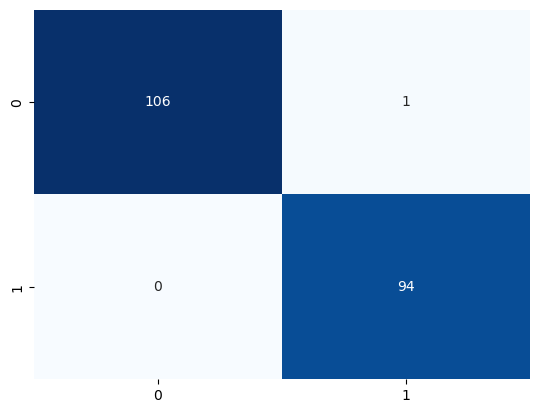

In [21]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)